In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/var/folders/3m/l0tyzx5j5lg1wtczpcc3ff8h0000gn/T/ipykernel_3391/3993962526.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('../clinical-notes-subsample/customer facing csv files/e_sample_notes.csv',  delimiter="|")

In [3]:
data.shape

(299, 3)

In [4]:
data.head()

,id,patient_id,"deidentified,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
0,"81|0|""a:4:{i:0;a:4:{s:4:""""curr"""";a:5:{s:5:""""As...",NaN,NaN
1,"64|0|""a:10:{i:0;a:6:{s:4:""""curr"""";a:5:{s:5:""""A...",NaN,NaN
2,"80|0|""a:4:{i:0;a:6:{s:4:""""curr"""";a:5:{s:5:""""As...",NaN,NaN
3,"57|0|""a:9:{i:0;a:6:{s:4:""""curr"""";a:5:{s:5:""""As...",NaN,NaN
4,"11|0|""a:28:{i:0;a:6:{s:4:""""curr"""";a:5:{s:5:""""A...",NaN,NaN


In [5]:
data.tail()

,id,patient_id,"deidentified,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
294,"55|9|""a:7:{i:0;a:4:{s:4:""""curr"""";a:5:{s:5:""""As...",NaN,NaN
295,"f/u 1 year BTM"""";s:3:""""Res""""; s:1:""""0"""";s:2:""""...",NaN,NaN
296,"77|9|""a:5:{i:0;a:4:{s:4:""""curr"""";a:5:{s:5:""""As...",NaN,NaN
297,"32|9|""a:5:{i:0;a:4:{s:4:""""curr"""";a:5:{s:5:""""As...",NaN,NaN
298,"83|9|""a:11:{i:0;a:6:{s:4:""""curr"""";a:5:{s:5:""""A...",NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   id                                                                              299 non-null    object 
 1   patient_id                                                                      7 non-null      float64
 2   deidentified,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,  7 non-null      object 
dtypes: float64(1), object(2)
memory usage: 7.1+ KB


## Checking for Duplication

In [8]:
data.nunique()

id                                                                                169
patient_id                                                                          4
deidentified,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,      1
dtype: int64

In [9]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

                                                    id  patient_id  \
16   ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...         NaN   
19   ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...         NaN   
21   vf and oct show probable deterioration in od, ...         NaN   
22   ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...         NaN   
23   cont latanoprost ou qhs ,,,,,,,,,,,,,,,,,,,,,,...         NaN   
..                                                 ...         ...   
227  corneal topography√Ç¬≠,,,,,,,,,,,,,,,,,,,,,,,,...         NaN   
229  corneal topography√Ç¬≠,,,,,,,,,,,,,,,,,,,,,,,,...         NaN   
231  corneal topography√Ç¬≠,,,,,,,,,,,,,,,,,,,,,,,,...         NaN   
273  ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...         NaN   
275  ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...         NaN   

    deidentified,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,  
16                                                 NaN                    

## Checking Missing Values

In [11]:
data.isnull().sum()

id                                                                                  0
patient_id                                                                        292
deidentified,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,    292
dtype: int64

In [12]:
(data.isnull().sum()/(len(data)))*100

id                                                                                 0.000000
patient_id                                                                        97.658863
deidentified,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,    97.658863
dtype: float64

<Axes: >

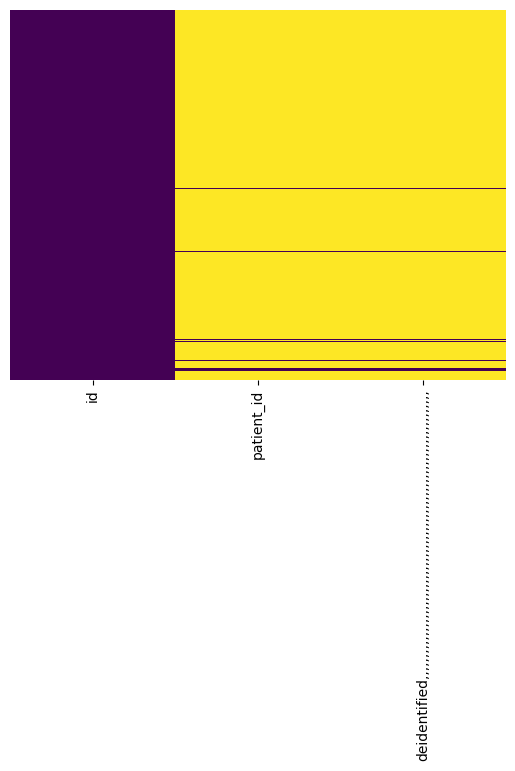

In [16]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
Poor Quality Data !

## Checking for inconsistent data types

In [14]:
data_types = data.dtypes
print(data_types)

id                                                                                 object
patient_id                                                                        float64
deidentified,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,     object
dtype: object
